In [1]:
!pip install pandas
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
# Read in the data
df = pd.read_csv('/workspaces/Datathon2023/dataset/SPD_Crime_Data__2008-Present.csv')

#Get the unique values from the offense type column
df['Offense Parent Group'].unique()

print(len(df))
date_time = pd.to_datetime(df['Offense Start DateTime'], format='%m/%d/%Y %H:%M:%S %p')
df['start_date_time'] = date_time
df = df.set_index('start_date_time')
df3 = df.groupby([pd.Grouper(freq='M'), 'Offense Parent Group']).size().reset_index(name='counts')
print(len(df3))

1033415
5323


<ipython-input-4-3f47554bcea6>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df4[df4['year'] < 2008][df4['counts'] > 0].plot(x='year', y='counts', kind='bar', title='Number of Crimes per Year Before 2008 (Start Time)')


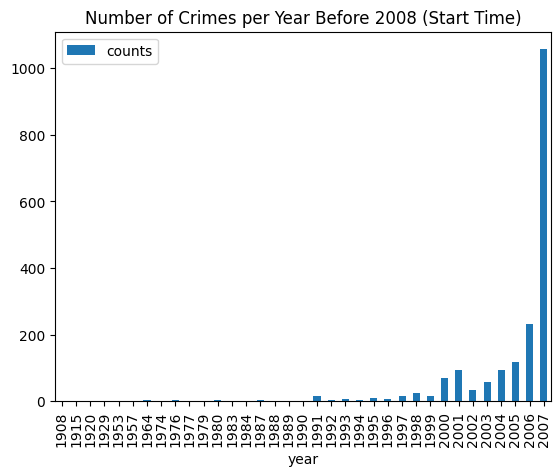

In [4]:
report_datetime = pd.to_datetime(df['Report DateTime'], format='%m/%d/%Y %H:%M:%S %p')
date_time = pd.to_datetime(df['Offense Start DateTime'], format='%m/%d/%Y %H:%M:%S %p')
df['start_date_time'] = date_time
df = df.set_index('start_date_time')
df3 = df.groupby([pd.Grouper(freq='D'), 'Offense Parent Group']).size().reset_index(name='counts')
df['report_date_time'] = report_datetime
df2 = df.groupby([pd.Grouper(freq='M'), 'Offense Parent Group', 'report_date_time']).size().reset_index(name='counts')



#get number of crimes per year
df4 = df.groupby([pd.Grouper(freq='Y')]).size().reset_index(name='counts')
df4['year'] = df4['start_date_time'].dt.year
df4 = df4.drop(columns=['start_date_time'])

#plot number of crimes per year before 2008. Only plot the year if the number of crimes is greater than 0
df4[df4['year'] < 2008][df4['counts'] > 0].plot(x='year', y='counts', kind='bar', title='Number of Crimes per Year Before 2008 (Start Time)')
plt.show()

In [5]:
#drop all rows before 2008 and make a new column that has the differnce between the report date and the offense start date
df2 = df2[df2['start_date_time'] >= '2008-01-01']
df2['time_diff'] = df2['report_date_time'] - df2['start_date_time']

#print the statistics for the time difference
print(df2['time_diff'].describe())

print(len(df2))

count                        1000192
mean     -7 days +01:00:14.019099334
std       74 days 08:32:17.741724305
min              -738 days +05:34:13
25%               -21 days +10:08:00
50%        -13 days +11:04:38.500000
75%                -5 days +09:38:36
max               5367 days 08:23:43
Name: time_diff, dtype: object
1000192


In [6]:
df3 = df3[df3['start_date_time'] >= '2008-01-01']
print(df3)

      start_date_time                      Offense Parent Group  counts
1142       2008-01-01                          ASSAULT OFFENSES      53
1143       2008-01-01                                BAD CHECKS       4
1144       2008-01-01                BURGLARY/BREAKING&ENTERING      18
1145       2008-01-01                    COUNTERFEITING/FORGERY       2
1146       2008-01-01  DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY      29
...               ...                                       ...     ...
87149      2023-02-15                      KIDNAPPING/ABDUCTION       1
87150      2023-02-15                             LARCENY-THEFT      11
87151      2023-02-15                       MOTOR VEHICLE THEFT       8
87152      2023-02-15                  STOLEN PROPERTY OFFENSES       1
87153      2023-02-15                 TRESPASS OF REAL PROPERTY       1

[86012 rows x 3 columns]


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


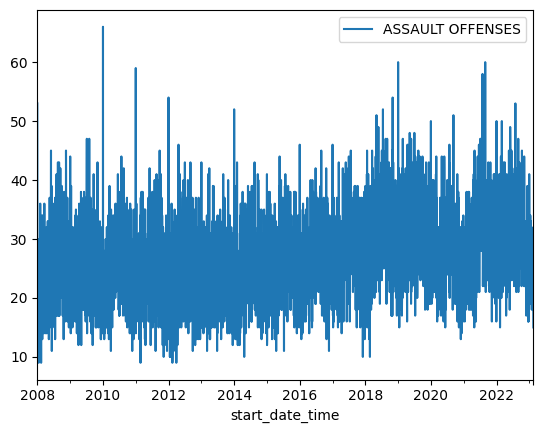

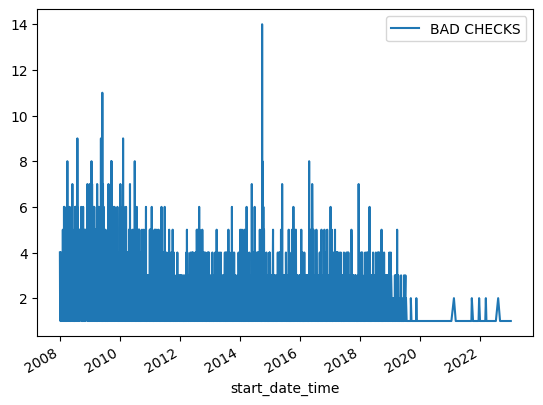

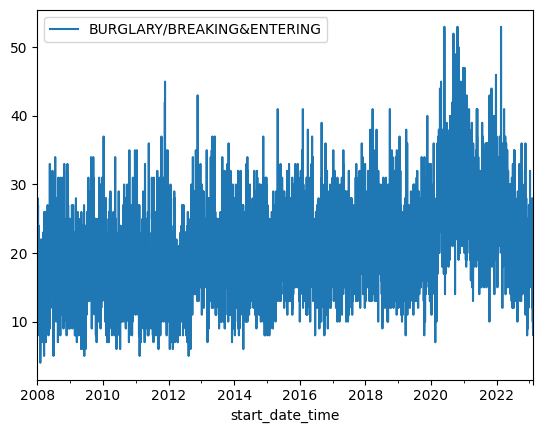

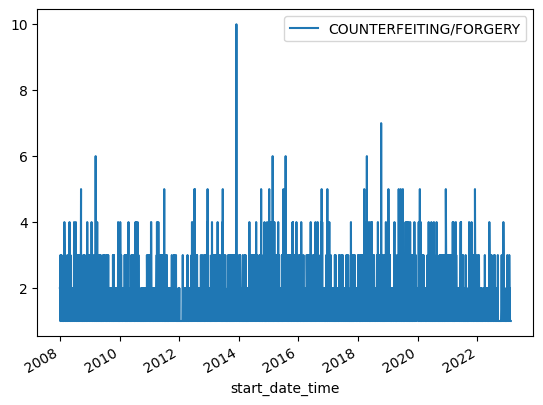

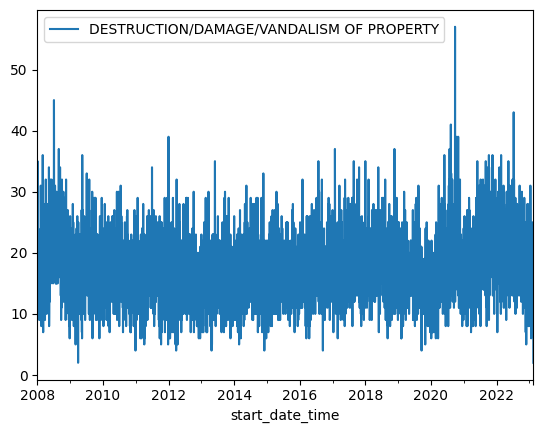

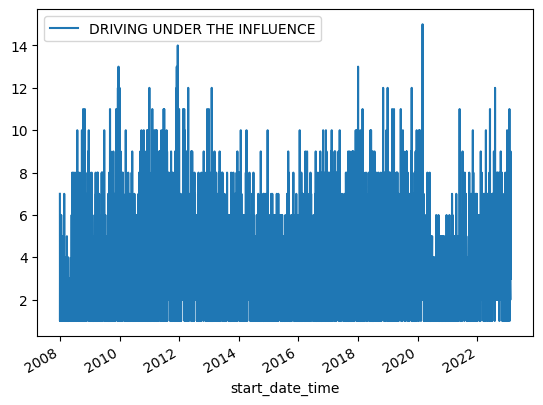

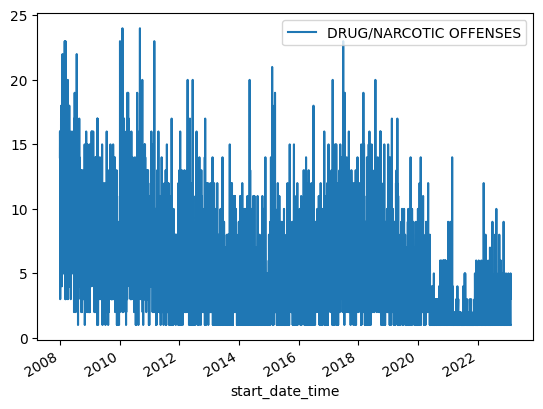

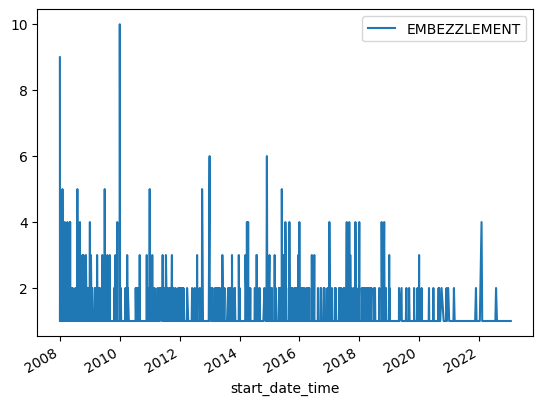

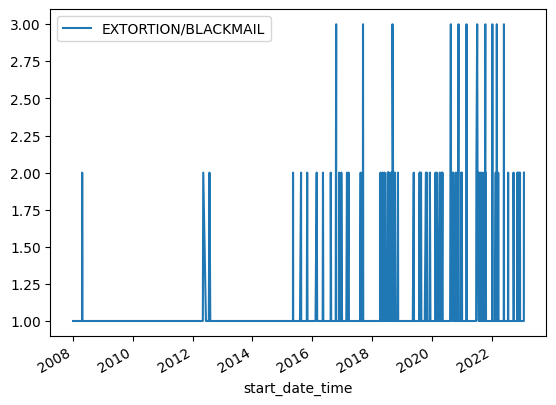

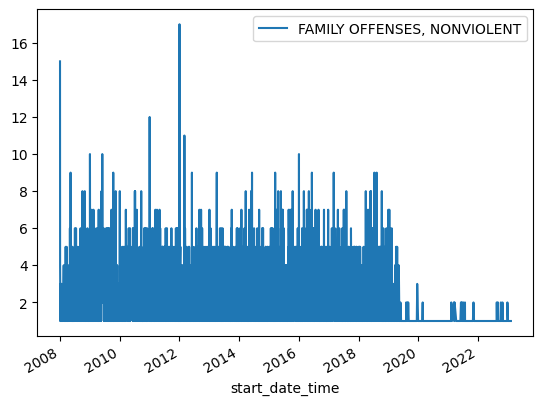

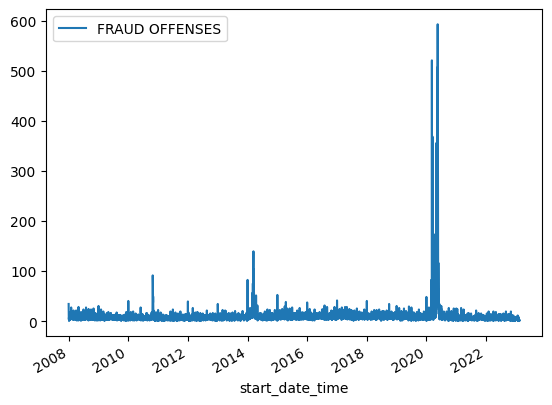

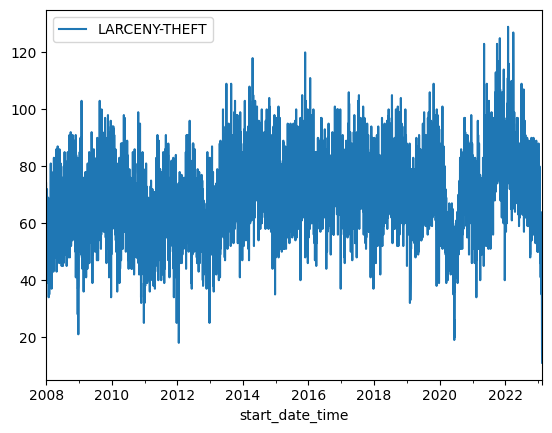

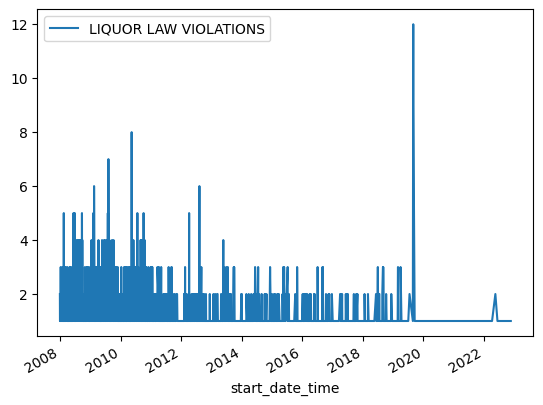

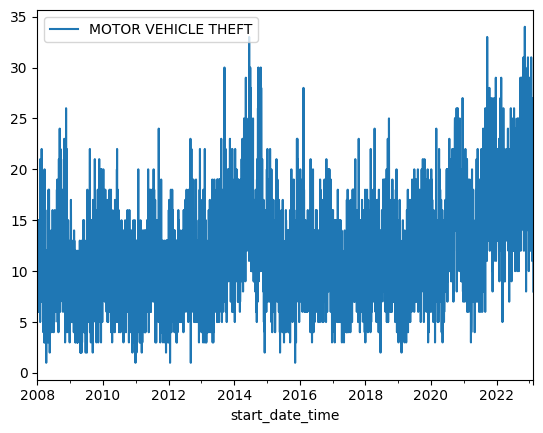

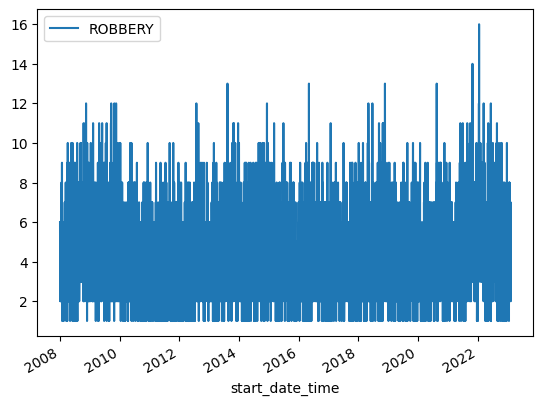

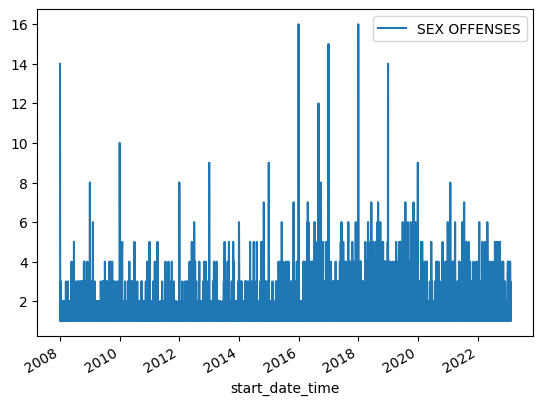

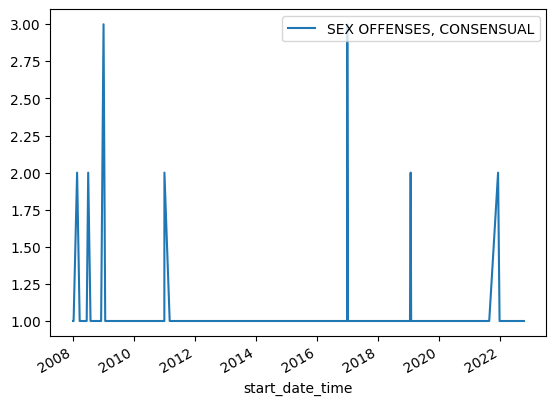

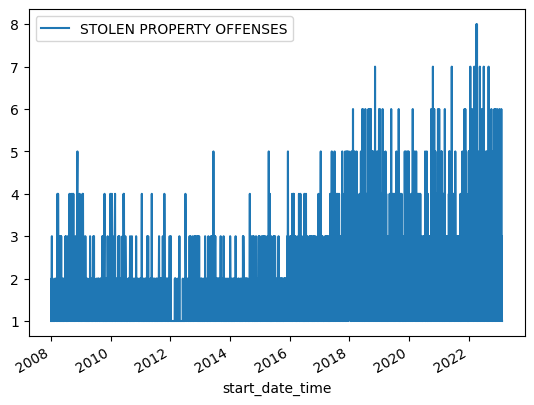

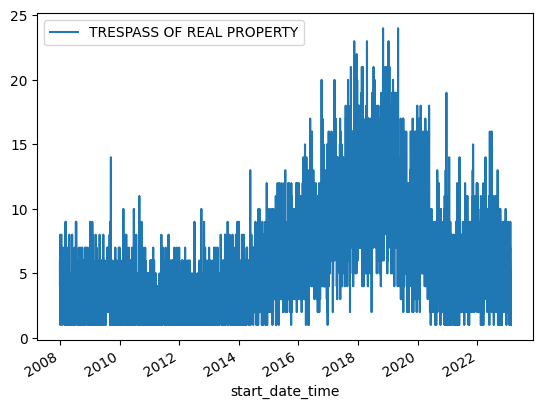

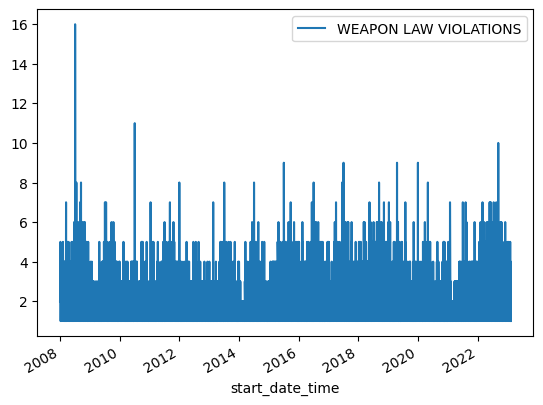

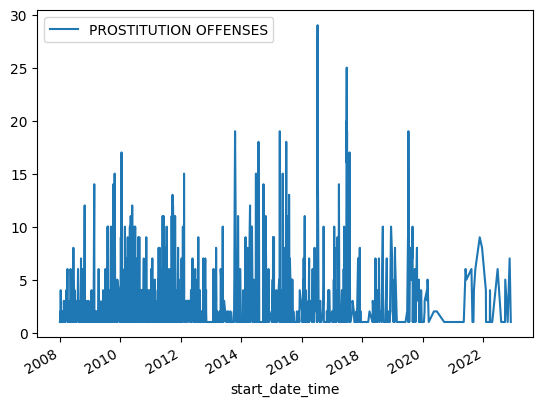

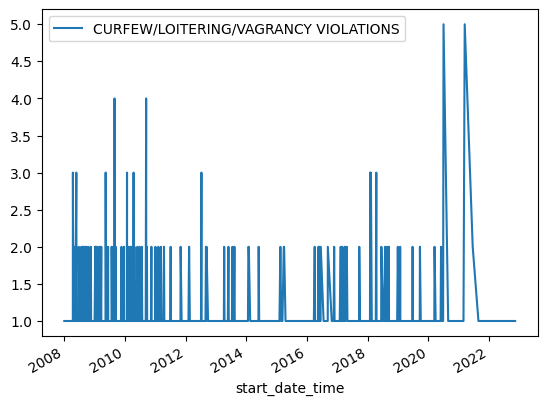

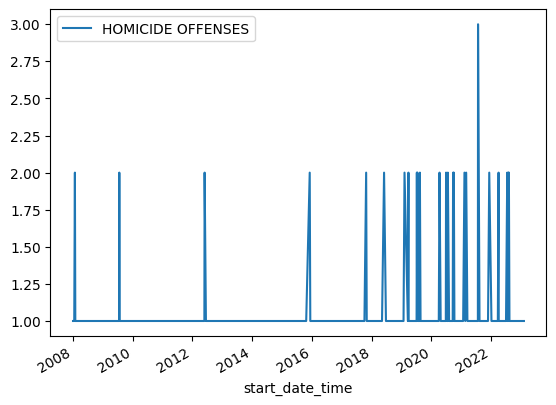

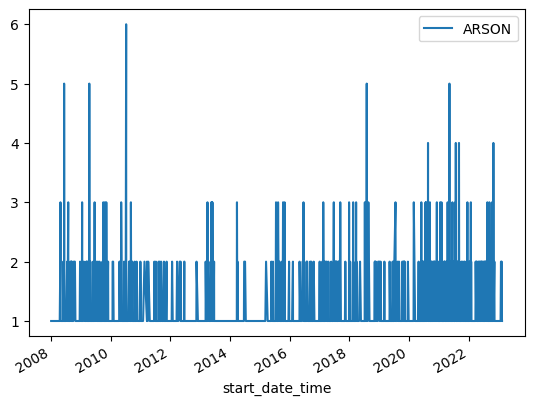

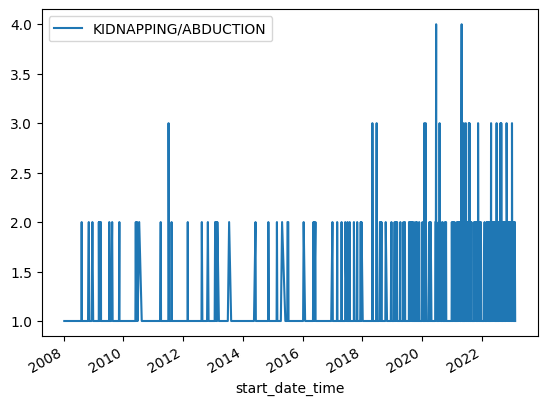

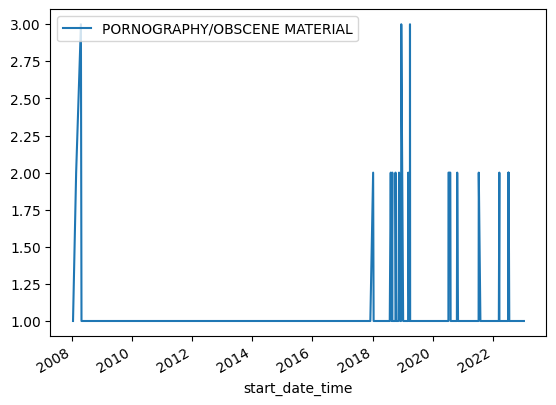

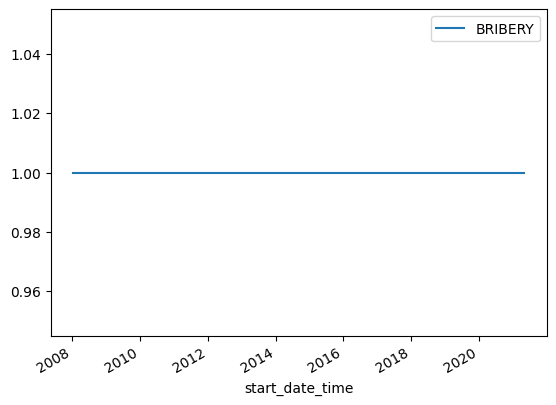

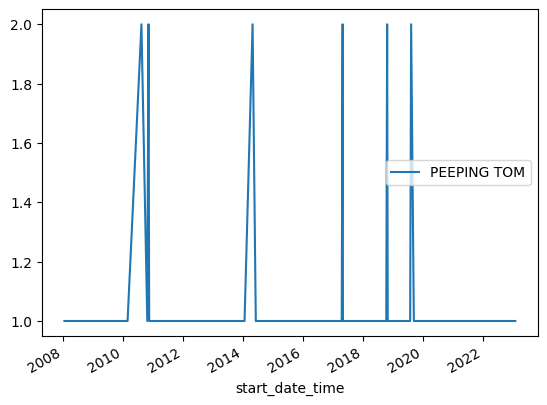

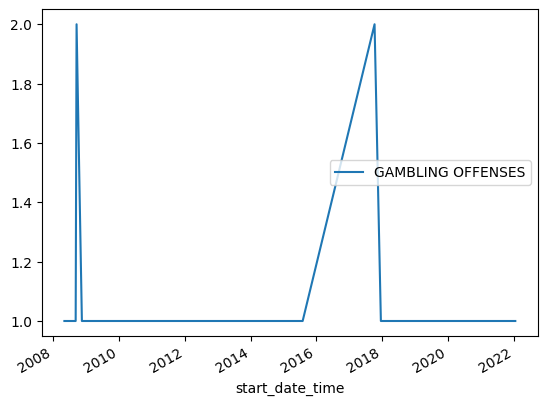

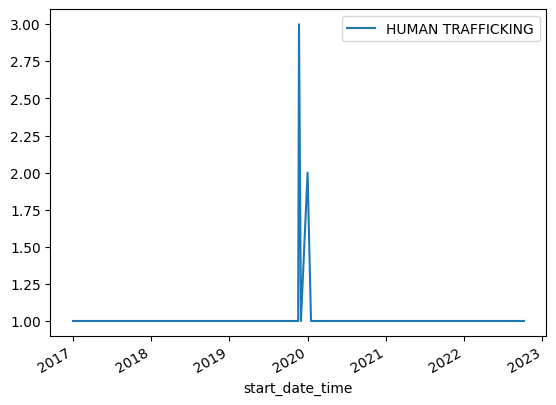

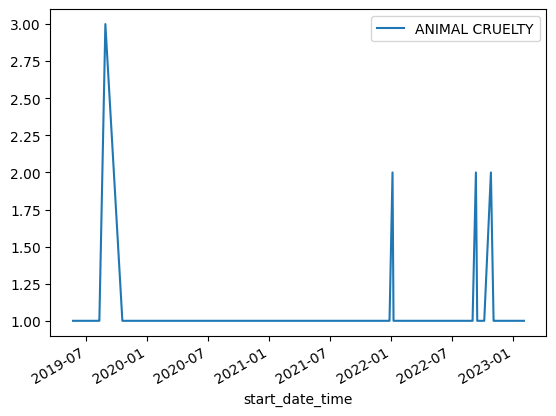

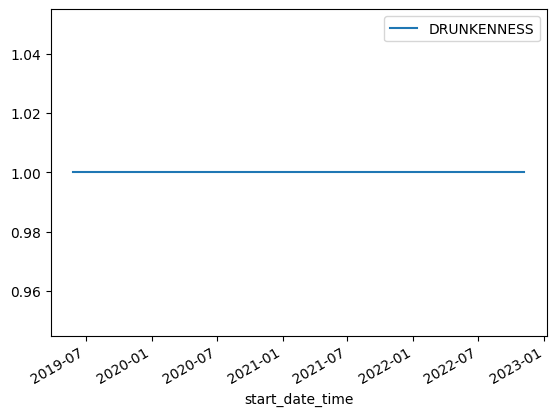

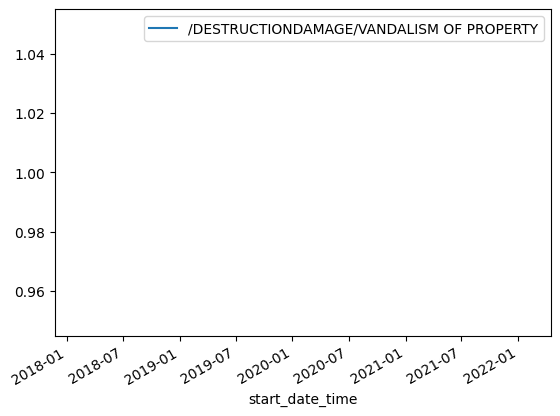

In [7]:
#Plot the data for each offense type
for offense in df3['Offense Parent Group'].unique():
    df3[df3['Offense Parent Group'] == offense].plot(x='start_date_time', y='counts', label=offense)
plt.legend()
plt.show()

In [8]:
print(df3[df3['Offense Parent Group'] == 'LARCENY-THEFT'])

      start_date_time Offense Parent Group  counts
1153       2008-01-01        LARCENY-THEFT      74
1171       2008-01-02        LARCENY-THEFT      49
1189       2008-01-03        LARCENY-THEFT      57
1206       2008-01-04        LARCENY-THEFT      55
1219       2008-01-05        LARCENY-THEFT      50
...               ...                  ...     ...
87099      2023-02-11        LARCENY-THEFT      54
87114      2023-02-12        LARCENY-THEFT      34
87124      2023-02-13        LARCENY-THEFT      35
87138      2023-02-14        LARCENY-THEFT      15
87150      2023-02-15        LARCENY-THEFT      11

[5525 rows x 3 columns]


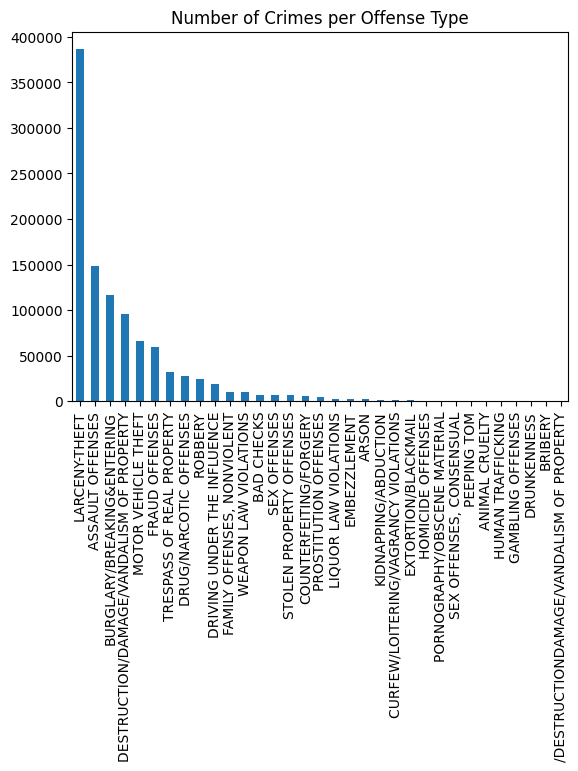

In [9]:
#Do a bar graph of the total number of crimes per offense type
df['Offense Parent Group'].value_counts().plot(kind='bar', title='Number of Crimes per Offense Type')
plt.show()

In [10]:
df_model = df3[df3['Offense Parent Group'] == 'FRAUD OFFENSES']
n = len(df_model)
print(n)
train_df = df_model[0:int(n*0.7)]
test_df = df_model[int(n*0.7):]

num_features = df_model.shape[1]

5517


In [11]:
print(train_df)
X_train = train_df['start_date_time']
y_train = train_df['counts']

X_test = test_df['start_date_time']
y_test = test_df['counts']

      start_date_time Offense Parent Group  counts
1152       2008-01-01       FRAUD OFFENSES      35
1170       2008-01-02       FRAUD OFFENSES       8
1187       2008-01-03       FRAUD OFFENSES       6
1205       2008-01-04       FRAUD OFFENSES       4
1218       2008-01-05       FRAUD OFFENSES       8
...               ...                  ...     ...
62509      2018-07-28       FRAUD OFFENSES       6
62525      2018-07-29       FRAUD OFFENSES       3
62543      2018-07-30       FRAUD OFFENSES      17
62560      2018-07-31       FRAUD OFFENSES       9
62575      2018-08-01       FRAUD OFFENSES      19

[3861 rows x 3 columns]


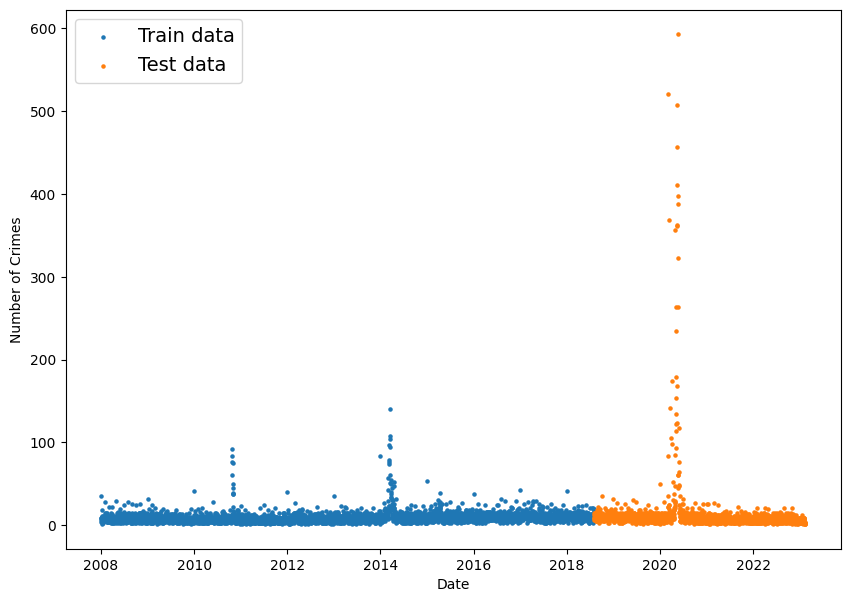

In [12]:
# Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("Number of Crimes")
plt.legend(fontsize=14)
plt.show()

In [13]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("Counts")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

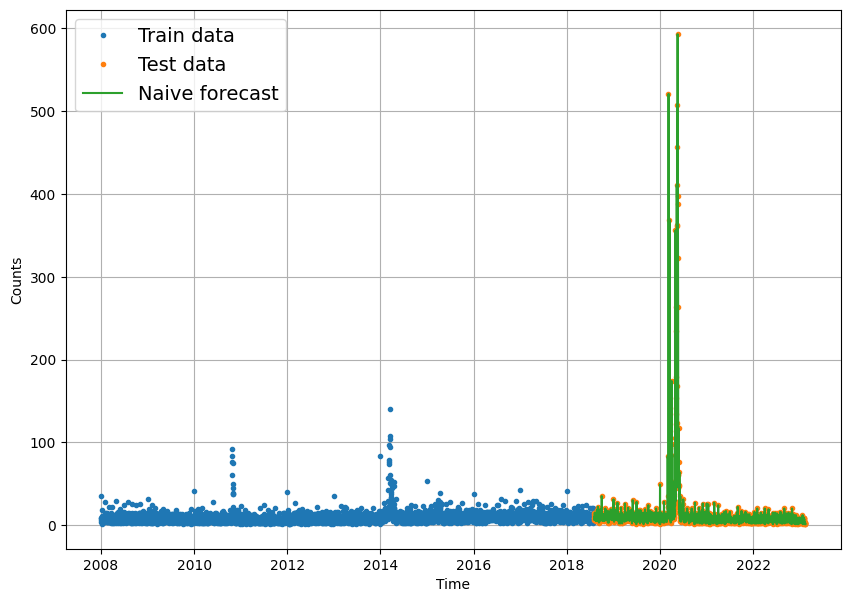

In [14]:
# Create a naïve forecast
naive_forecast = y_test[:-1] # Naïve forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:] # View frist 10 and last 10

# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");
plt.show()

In [15]:
# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [16]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [17]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
print(naive_results)

{'mae': 7.891843, 'mse': 1027.8931, 'rmse': 32.060772, 'mape': 71.07963, 'mase': 0.9993958}


In [18]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [19]:
# Create function to view NumPy arrays as windows 
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [20]:
counts = df_model['counts'].to_numpy()
full_windows, full_labels = make_windows(counts, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)
#print the mean
print(np.mean(counts))

10.542504984593077


In [21]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [35  8  6  4  8  1 10] -> Label: [18]
Window: [ 8  6  4  8  1 10 18] -> Label: [10]
Window: [ 6  4  8  1 10 18 10] -> Label: [11]


In [22]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [23]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(4408, 1102, 4408, 1102)

In [24]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

In [25]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [26]:
from tensorflow.keras import layers
# Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(256, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(32, activation="relu"),
  layers.Dense(16, activation="relu"),
  layers.Dense(HORIZON, activation="linear")                       
], name="model_1_dense") 

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit model
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=10000000,
            verbose=1,
            batch_size=64,
            validation_data=(test_windows, test_labels),
            callbacks=[callback]) 

Epoch 1/10000000
69/69 [==============================] - 3s 7ms/step - loss: 4.0334 - mae: 4.0334 - val_loss: 8.1982 - val_mae: 8.1982
Epoch 2/10000000
69/69 [==============================] - 0s 6ms/step - loss: 3.5134 - mae: 3.5134 - val_loss: 8.0534 - val_mae: 8.0534
Epoch 3/10000000
69/69 [==============================] - 0s 6ms/step - loss: 3.4415 - mae: 3.4415 - val_loss: 8.0149 - val_mae: 8.0149
Epoch 4/10000000
69/69 [==============================] - 0s 5ms/step - loss: 3.4313 - mae: 3.4313 - val_loss: 7.8671 - val_mae: 7.8671
Epoch 5/10000000
69/69 [==============================] - 0s 5ms/step - loss: 3.4464 - mae: 3.4464 - val_loss: 7.7237 - val_mae: 7.7237
Epoch 6/10000000
69/69 [==============================] - 0s 5ms/step - loss: 3.4199 - mae: 3.4199 - val_loss: 7.7071 - val_mae: 7.7071
Epoch 7/10000000
69/69 [==============================] - 0s 6ms/step - loss: 3.3926 - mae: 3.3926 - val_loss: 7.5482 - val_mae: 7.5482
Epoch 8/10000000
69/69 [========================

In [27]:
# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
# print(x.shape)
# x = layers.LSTM(128, activation="relu", return_sequences=True)(x) # this layer will error if the inputs are not the right shape
x = layers.LSTM(256, activation="relu")(x) # using the tanh loss function results in a massive error
# print(x.shape)
# Add another optional dense layer (you could add more of these to see if they improve model performance)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

# Compile model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554 
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name), callback])

INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


In [28]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm/")
model_5.evaluate(test_windows, test_labels)

35/35 [==============================] - 0s 4ms/step - loss: 6.8973


6.89733362197876